### Loading and basic analysis of the simulation log records

Monte-Carlo iterations represent the system 'time' evolution.  
Functionality is similar to the accompanying python [script](./read_log.py).  
Please feel free to adjust them to your needs.

In [1]:
# uncomment to plot into separate windows:
#%matplotlib   

from common import import_log_files, plot_timedata

Set the directory to the log files and the min, max Monte Carlo run indexes:

In [2]:
path = '../../examples/example1/'
run_first = 0
run_last = 1

Import data from the files:

In [3]:
ravg, pat = import_log_files(path, [run_first, run_last])

Reading data from: ../../examples/example1/log_0.txt
read in: 101 records
Reading data from: ../../examples/example1/log_1.txt
read in: 101 records


'ravg' contains the averages over [run_first : run_last].


Fit the time coarse of the number of aggregates present in the system 
and plot the result along with the original data.  
Decreasing exponential function 
$$y(x) = a e^{-x/b} + c$$
approximates the aggregation progression.  
The initial guess is [*a*, *b*, *c*].

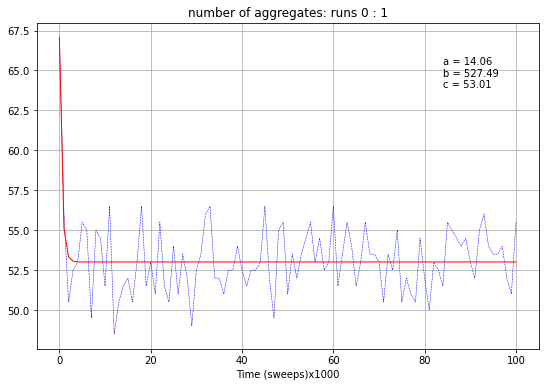

In [5]:
ravg.fit_num_sc([65., 100., 56.])
title = 'number of aggregates: runs ' + pat
plot_timedata(title, 
              ravg.inds, 
              ravg.num_sc['raw'],
              ravg.num_sc['pars'],
              ravg.num_sc['fit'], 
              colors=['b--', 'r'], 
              figsize=(9, 6))

Fit the time coarse for the aggregare masses 
and plot the result along with the original data.  
Growing exponential function 
$$y(x) = a(1 - e^{-x/b}) + c$$
approximates the progression.  
The initial guess [*a*, *b*, *c*] is supplied for each of the 5 mass components.

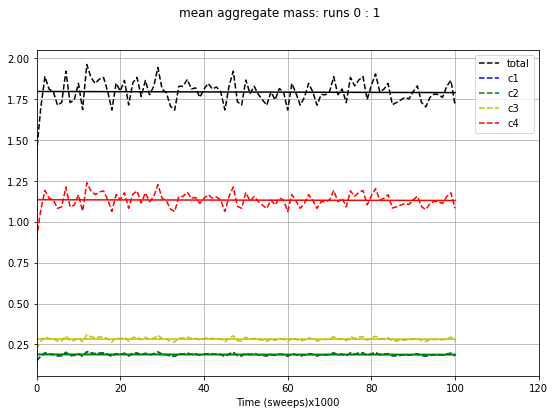

Optimal parameters for the masses: 

Component 0 : [ 9.03682921e+00 -1.29294013e+08  1.79572687e+00]
Component 1 : [ 2.58164460e+01 -3.51357915e+09  1.89023296e-01]
Component 2 : [-1.61826838e+00  2.20181214e+08  1.89023337e-01]
Component 3 : [-1.07421535e+00  9.75029968e+07  2.83534562e-01]
Component 4 : [ 3.64368557e+00 -8.25138773e+07  1.13414435e+00]


In [6]:
ravg.fit_masses([[1., 50, 2.], [0.2, 50, 2.], [0.15, 50, 0.25], [0.15, 50, 0.25], [0.5, 50, 1.]])
ravg.plot_aggregate_mass(pat, with_fit=True, figsize=(9, 6))
print('Optimal parameters for the masses: \n')
[print(f'Component {i} : {p}') for i, p in enumerate(ravg.sc_mean_mass['pars'])];

Plot time evolution of the interparticle connectivity:

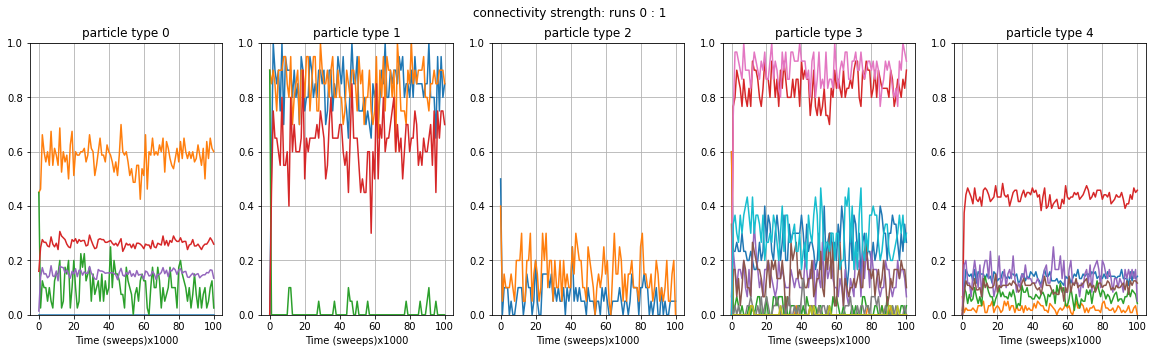

In [7]:
ravg.plot_connectivity(pat)